In [1]:
# munging imports
import pandas as pd
import numpy as np

# visualization imports
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

%matplotlib inline

# modeling imports
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

In [2]:
df= pd.read_csv('gmdc_df_clean.csv')

In [3]:
df.head()

,Star Client,Loan Type,Requested Loan Amount,Revenue,Age,Income Source,Credit Type,Monthly Income,Car Owner,Returning Client,State,Home Owner,Armed forces,Created DOW,Created Time Braket,Duration_Mod_Cre
0,0,Payday,500.0,0.18,56.000000,Job Employment,poor,1000.0,No,No,North Carolina,No,No,Tuesday,Morning,1586:32:00
1,0,Payday,100.0,0.25,38.814992,Job Employment,poor,1000.0,No,No,Oklahoma,No,No,Friday,Morning,17351:23:00
2,0,Personal Loan,500.0,0.00,58.000000,Job Employment,fair,5000.0,Yes,No,Pennsylvania,No,No,Saturday,Afternoon,563:34:00
3,0,Payday,400.0,0.18,28.000000,Job Employment,fair,2500.0,No,No,Ohio,Yes,No,Saturday,Evening,764:22:00
4,0,Payday,400.0,0.09,44.000000,Job Employment,poor,2000.0,Yes,No,Texas,No,No,Sunday,Afternoon,1605:35:00


In [4]:
df_1 = df.copy()

## Plots & EDA

0    0.937788
1    0.062212
Name: Star Client, dtype: float64


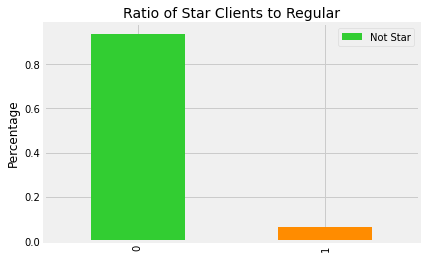

In [5]:
clients = df_1['Star Client'].value_counts(normalize=True) 
print(clients)

clients.plot(kind='bar', color=['limegreen', 'darkorange'], ylabel='Percentage');
plt.legend(['Not Star', 'Star'], loc="upper right");
plt.title('Ratio of Star Clients to Regular', fontdict = {'fontsize' : 14});

## Baseline with 4

### Preparing Dummies

In [6]:
#Income Source Dummies
df_1 = pd.get_dummies(df_1, columns=['Income Source'], drop_first=False) 

In [7]:
df_1.head()

,Star Client,Loan Type,Requested Loan Amount,Revenue,Age,Credit Type,Monthly Income,Car Owner,Returning Client,State,Home Owner,Armed forces,Created DOW,Created Time Braket,Duration_Mod_Cre,Income Source_Benefits,Income Source_Job Employment,Income Source_Self Employed,Income Source_Unemployed
0,0,Payday,500.0,0.18,56.000000,poor,1000.0,No,No,North Carolina,No,No,Tuesday,Morning,1586:32:00,0,1,0,0
1,0,Payday,100.0,0.25,38.814992,poor,1000.0,No,No,Oklahoma,No,No,Friday,Morning,17351:23:00,0,1,0,0
2,0,Personal Loan,500.0,0.00,58.000000,fair,5000.0,Yes,No,Pennsylvania,No,No,Saturday,Afternoon,563:34:00,0,1,0,0
3,0,Payday,400.0,0.18,28.000000,fair,2500.0,No,No,Ohio,Yes,No,Saturday,Evening,764:22:00,0,1,0,0
4,0,Payday,400.0,0.09,44.000000,poor,2000.0,Yes,No,Texas,No,No,Sunday,Afternoon,1605:35:00,0,1,0,0


In [8]:
#Loan Type
df_1 = pd.get_dummies(df_1, columns=['Loan Type'], drop_first=False) 

In [9]:
#Credit Type
df_1 = pd.get_dummies(df_1, columns=['Credit Type'], drop_first=False) 

In [10]:
#Car Owner
df_1 = pd.get_dummies(df_1, columns=['Car Owner'], drop_first=False) 

In [11]:
#Returning Client
df_1 = pd.get_dummies(df_1, columns=['Returning Client'], drop_first=False) 

In [12]:
#Home Owner
df_1 = pd.get_dummies(df_1, columns=['Home Owner'], drop_first=False) 

In [13]:
#Armed Forces
df_1 = pd.get_dummies(df_1, columns=['Armed forces'], drop_first=False) 

In [14]:
#Created Day of the Week
df_1 = pd.get_dummies(df_1, columns=['Created DOW'], drop_first=False) 

In [15]:
#Created Time Braket
df_1 = pd.get_dummies(df_1, columns=['Created Time Braket'], drop_first=False) 

In [16]:
df_1['State'].value_counts()

Texas                    1093
California                512
Ohio                      478
South Carolina            380
Louisiana                 352
Florida                   276
North Carolina            264
Missouri                  232
Georgia                   220
Tennessee                 206
Alabama                   202
Mississippi               197
Nevada                    157
Indiana                   154
Illinois                  140
Michigan                  138
Wisconsin                 132
Virginia                  117
Arizona                   112
Kentucky                   91
Kansas                     91
New Jersey                 78
Oklahoma                   77
Maryland                   72
New Mexico                 71
Delaware                   67
Pennsylvania               56
Utah                       54
Massachusetts              51
Colorado                   47
Washington                 43
Rhode Island               38
Oregon                     34
Minnesota 

In [17]:
#Changing States into 4 regions for dummies
West = ['California', 'Alaska','Nevada','Hawaii','Utah','Colorado','Oregon','Washington','Idaho','Montana','Wyoming']
Southwest = ['Arizona','New Mexico','Oklahoma','Texas']
Midwest = ['North Dakota','South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri','Illinois','Indiana','Wisconsin','Michigan','Ohio']
Southeast = ['Arkansas','Louisiana','Mississippi','Alabama','Tennessee','Kentucky','Florida','Georgia','South Carolina','North Carolina','Virginia','West Virginia','Maryland','Delaware','District of Columbia']
Northeast = ['New Jersey','Pennsylvania','New York','Connecticut','Rhode Island','Massachusetts','Vermont','New Hampshire','Maine']
Arm_force = ['Armed Forces Europe','Armed Forces Pacific','Armed Forces Americas']
        

In [18]:
def state_change(row):
    if row['State'] in West:
        row['State'] = 'West'
    elif row['State'] in Southwest:
        row['State'] = 'Southwest'
    elif row['State'] in Midwest:
        row['State'] = 'Midwest'
    elif row['State'] in Southeast:
        row['State'] = 'Southeast'
    elif row['State'] in Northeast:
        row['State'] = 'Northeast'
    elif row['State'] in Arm_force:
        row['State'] = 'Arm Force'
    return row


In [19]:
df_1 = df_1.apply(state_change,axis = 1)

In [20]:
#State 
df_1 = pd.get_dummies(df_1, columns=['State'], drop_first=False) 

In [21]:
df_1.head()

,Star Client,Requested Loan Amount,Revenue,Age,Monthly Income,Duration_Mod_Cre,Income Source_Benefits,Income Source_Job Employment,Income Source_Self Employed,Income Source_Unemployed,...,Created Time Braket_Afternoon,Created Time Braket_Evening,Created Time Braket_Morning,Created Time Braket_Night,State_Arm Force,State_Midwest,State_Northeast,State_Southeast,State_Southwest,State_West
0,0,500.0,0.18,56.000000,1000.0,1586:32:00,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
1,0,100.0,0.25,38.814992,1000.0,17351:23:00,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
2,0,500.0,0.00,58.000000,5000.0,563:34:00,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,400.0,0.18,28.000000,2500.0,764:22:00,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
4,0,400.0,0.09,44.000000,2000.0,1605:35:00,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0


In [22]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6510 entries, 0 to 6509
Data columns (total 43 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Star Client                    6510 non-null   int64  
 1   Requested Loan Amount          6510 non-null   float64
 2   Revenue                        6510 non-null   float64
 3   Age                            6510 non-null   float64
 4   Monthly  Income                6510 non-null   float64
 5   Duration_Mod_Cre               6510 non-null   object 
 6   Income Source_Benefits         6510 non-null   int64  
 7   Income Source_Job Employment   6510 non-null   int64  
 8   Income Source_Self Employed    6510 non-null   int64  
 9   Income Source_Unemployed       6510 non-null   int64  
 10  Loan Type_Installment          6510 non-null   int64  
 11  Loan Type_Payday               6510 non-null   int64  
 12  Loan Type_Personal Loan        6510 non-null   i

In [23]:
df_1.head()

,Star Client,Requested Loan Amount,Revenue,Age,Monthly Income,Duration_Mod_Cre,Income Source_Benefits,Income Source_Job Employment,Income Source_Self Employed,Income Source_Unemployed,...,Created Time Braket_Afternoon,Created Time Braket_Evening,Created Time Braket_Morning,Created Time Braket_Night,State_Arm Force,State_Midwest,State_Northeast,State_Southeast,State_Southwest,State_West
0,0,500.0,0.18,56.000000,1000.0,1586:32:00,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
1,0,100.0,0.25,38.814992,1000.0,17351:23:00,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
2,0,500.0,0.00,58.000000,5000.0,563:34:00,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,400.0,0.18,28.000000,2500.0,764:22:00,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
4,0,400.0,0.09,44.000000,2000.0,1605:35:00,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0


In [24]:
df_dum = df_1.copy()

In [25]:
# Dropping Revenue since the star client characterisitc has been designed from Revenue
df_dum.drop('Revenue', axis=1, inplace=True)

In [26]:
df_dum.to_csv('gmdc_df_dum.csv', encoding='utf-8', index=False)

## Normalizing 

In [27]:
df_dum.columns

Index(['Star Client', 'Requested Loan Amount', 'Age', 'Monthly  Income',
       'Duration_Mod_Cre', 'Income Source_Benefits',
       'Income Source_Job Employment', 'Income Source_Self Employed',
       'Income Source_Unemployed', 'Loan Type_Installment', 'Loan Type_Payday',
       'Loan Type_Personal Loan', 'Credit Type_No sure',
       'Credit Type_excellent', 'Credit Type_fair', 'Credit Type_good',
       'Credit Type_poor', 'Car Owner_No', 'Car Owner_Yes',
       'Returning Client_No', 'Returning Client_Yes', 'Home Owner_No',
       'Home Owner_Yes', 'Armed forces_No', 'Armed forces_Yes',
       'Created DOW_Friday', 'Created DOW_Monday', 'Created DOW_Saturday',
       'Created DOW_Sunday', 'Created DOW_Thursday', 'Created DOW_Tuesday',
       'Created DOW_Wednesday', 'Created Time Braket_Afternoon',
       'Created Time Braket_Evening', 'Created Time Braket_Morning',
       'Created Time Braket_Night', 'State_Arm Force', 'State_Midwest',
       'State_Northeast', 'State_Southeast'

In [28]:
# Making a new DF with the target in the last column for better plotting
df_normalized = df_dum.loc[:,['Star Client', 'Requested Loan Amount', 'Age', 'Monthly  Income', 'Income Source_Benefits',
       'Income Source_Job Employment', 'Income Source_Self Employed',
       'Income Source_Unemployed', 'Loan Type_Installment', 'Loan Type_Payday',
       'Loan Type_Personal Loan', 'Credit Type_No sure',
       'Credit Type_excellent', 'Credit Type_fair', 'Credit Type_good',
       'Credit Type_poor', 'Car Owner_No', 'Car Owner_Yes',
       'Returning Client_No', 'Returning Client_Yes', 'Home Owner_No',
       'Home Owner_Yes', 'Armed forces_No', 'Armed forces_Yes',
       'Created DOW_Friday', 'Created DOW_Monday', 'Created DOW_Saturday',
       'Created DOW_Sunday', 'Created DOW_Thursday', 'Created DOW_Tuesday',
       'Created DOW_Wednesday', 'Created Time Braket_Afternoon',
       'Created Time Braket_Evening', 'Created Time Braket_Morning',
       'Created Time Braket_Night', 'State_Arm Force', 'State_Midwest',
       'State_Northeast', 'State_Southeast', 'State_Southwest', 'State_West']]

In [29]:
df_normalized_nodum = df_dum.loc[:,['Requested Loan Amount', 'Age',
       'Monthly  Income','Star Client']]

/Users/amirreza/opt/anaconda3/envs/metis/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


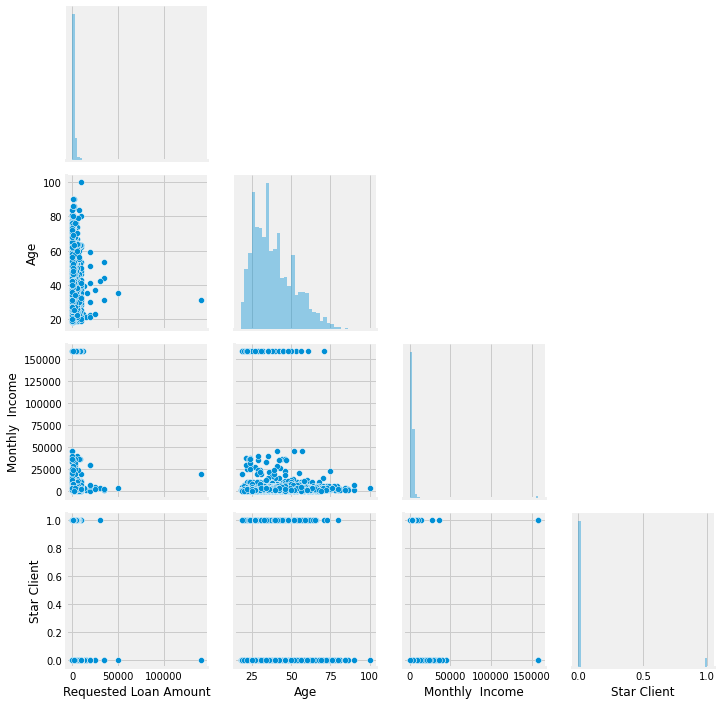

In [30]:
# Sometimtes plotting PairGrid takes a while, and we don't need to see *all* the data, so a sample will do
g = sns.PairGrid(df_normalized_nodum.sample(frac=0.6), diag_sharey=False, corner=True)
g.map_lower(sns.scatterplot)
g.map_diag(sns.distplot, kde=False)

### Setting up for the models Standard Scaling and Regularization

### Feature Engineering:

In [31]:
#Separate our features from our target

X = df_normalized.loc[:,['Requested Loan Amount', 'Age',
       'Monthly  Income', 'Income Source_Benefits',
       'Income Source_Job Employment', 'Income Source_Self Employed',
       'Income Source_Unemployed', 'Loan Type_Installment', 'Loan Type_Payday',
       'Loan Type_Personal Loan', 'Credit Type_No sure',
       'Credit Type_excellent', 'Credit Type_fair', 'Credit Type_good',
       'Credit Type_poor', 'Car Owner_No', 'Car Owner_Yes',
       'Returning Client_No', 'Returning Client_Yes', 'Home Owner_No',
       'Home Owner_Yes', 'Armed forces_No', 'Armed forces_Yes',
       'Created DOW_Friday', 'Created DOW_Monday', 'Created DOW_Saturday',
       'Created DOW_Sunday', 'Created DOW_Thursday', 'Created DOW_Tuesday',
       'Created DOW_Wednesday', 'Created Time Braket_Afternoon',
       'Created Time Braket_Evening', 'Created Time Braket_Morning',
       'Created Time Braket_Night', 'State_Arm Force', 'State_Midwest',
       'State_Northeast', 'State_Southeast', 'State_Southwest', 'State_West']]

y = df_normalized['Star Client']

# create overall quality squared term, which we expect to 
# help based on the relationship we see in the pair plot 
#X['Age^2'] =(X['Age'])**2
#X['Min^2'] = (X['Min'])**2
#X['3^Gls'] = 3**(X['Gls'])
#X['Ast^2'] = (X['Ast'])**2
# multiplicative interaction
#X['Age_x_Min'] = X['Age'] * X['Min']
#X['Age_x_Gls'] = X['Age'] * X['Gls']
#X['Age_x_Ast'] = X['Age'] * X['Ast']

# division interaction
#X['Ast_/_Min'] = X['Ast'] / X['Min']
#X['Gls_/_Min'] = X['Gls'] / X['Min']

In [32]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6510 entries, 0 to 6509
Data columns (total 40 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Requested Loan Amount          6510 non-null   float64
 1   Age                            6510 non-null   float64
 2   Monthly  Income                6510 non-null   float64
 3   Income Source_Benefits         6510 non-null   int64  
 4   Income Source_Job Employment   6510 non-null   int64  
 5   Income Source_Self Employed    6510 non-null   int64  
 6   Income Source_Unemployed       6510 non-null   int64  
 7   Loan Type_Installment          6510 non-null   int64  
 8   Loan Type_Payday               6510 non-null   int64  
 9   Loan Type_Personal Loan        6510 non-null   int64  
 10  Credit Type_No sure            6510 non-null   int64  
 11  Credit Type_excellent          6510 non-null   int64  
 12  Credit Type_fair               6510 non-null   i

In [33]:
#Split the data 60 - 20 - 20 train/val/test

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=.25, random_state=43)

In [34]:
X_train.columns

Index(['Requested Loan Amount', 'Age', 'Monthly  Income',
       'Income Source_Benefits', 'Income Source_Job Employment',
       'Income Source_Self Employed', 'Income Source_Unemployed',
       'Loan Type_Installment', 'Loan Type_Payday', 'Loan Type_Personal Loan',
       'Credit Type_No sure', 'Credit Type_excellent', 'Credit Type_fair',
       'Credit Type_good', 'Credit Type_poor', 'Car Owner_No', 'Car Owner_Yes',
       'Returning Client_No', 'Returning Client_Yes', 'Home Owner_No',
       'Home Owner_Yes', 'Armed forces_No', 'Armed forces_Yes',
       'Created DOW_Friday', 'Created DOW_Monday', 'Created DOW_Saturday',
       'Created DOW_Sunday', 'Created DOW_Thursday', 'Created DOW_Tuesday',
       'Created DOW_Wednesday', 'Created Time Braket_Afternoon',
       'Created Time Braket_Evening', 'Created Time Braket_Morning',
       'Created Time Braket_Night', 'State_Arm Force', 'State_Midwest',
       'State_Northeast', 'State_Southeast', 'State_Southwest', 'State_West'],
      

In [35]:
X_train.shape

(3906, 40)

In [36]:
X_val.shape

(1302, 40)

In [37]:
X_test.shape

(1302, 40)

## Standard Scaling

In [38]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [39]:
## This step fits the Standard Scaler to the training data
## Essentially it finds the mean and standard deviation of each variable in the training set

std = StandardScaler()
std.fit(X_train.values)

StandardScaler()

In [40]:
## This step applies the scaler to the train set.
## It subtracts the mean it learned in the previous step and then divides by the standard deviation

X_tr = std.transform(X_train.values)

In [41]:
## Apply the scaler to the test set

X_te = std.transform(X_test.values)

In [42]:
## Note that even though we put a Pandas Dataframe into the scalar, what comes out is a numpy array
## In general, sklearn works on numpy.  It will accept pandas objects by trying to coerce them to numpy arrays
## But it will not usually output pandas objects

type(X_train), type(X_tr)

(pandas.core.frame.DataFrame, numpy.ndarray)

In [43]:
row, col = X_tr.shape

In [44]:
print(col)

40


In [45]:
print(range(col))

range(0, 40)


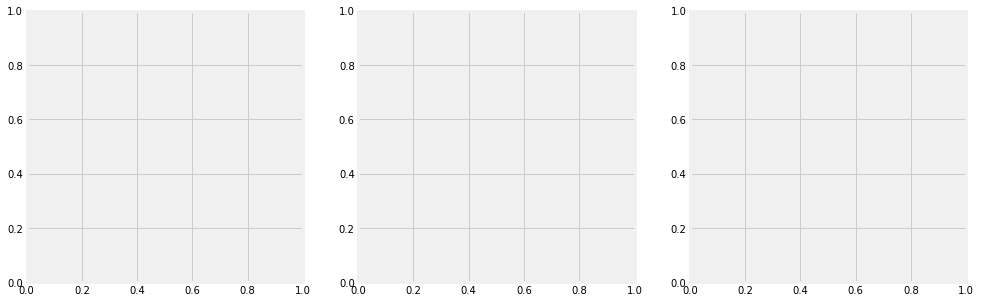

In [46]:
## Here we can plot histograms of a few transformed variables
## Note that they seem to have means of 0 and stddevs of 1
## (though they are not necessarily normally distributed)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

#for i in range(col):
#sns.distplot(X_tr[:, 0], label='feature 1', ax=axes[0], kde=False, bins=10, norm_hist=True)
#sns.distplot(X_tr[:, 1], label='feature 2', ax=axes[1], kde=False, bins=10, norm_hist=True)
#sns.distplot(X_tr[:, 2], label='feature 3', ax=axes[2], kde=False, bins=10, norm_hist=True)
#sns.distplot(X_tr[:, 3], label='feature 4', ax=axes[3], kde=False, bins=10, norm_hist=True)

## KNN 

In [47]:
df_normalized.head()

,Star Client,Requested Loan Amount,Age,Monthly Income,Income Source_Benefits,Income Source_Job Employment,Income Source_Self Employed,Income Source_Unemployed,Loan Type_Installment,Loan Type_Payday,...,Created Time Braket_Afternoon,Created Time Braket_Evening,Created Time Braket_Morning,Created Time Braket_Night,State_Arm Force,State_Midwest,State_Northeast,State_Southeast,State_Southwest,State_West
0,0,500.0,56.000000,1000.0,0,1,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
1,0,100.0,38.814992,1000.0,0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
2,0,500.0,58.000000,5000.0,0,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,400.0,28.000000,2500.0,0,1,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0
4,0,400.0,44.000000,2000.0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0


In [48]:
#X = df_dum.iloc[:, 1:]
#y = df_dum.iloc[:, 0]

In [49]:
# print the shapes of X and y
print(X.shape)
print(y.shape)

(6510, 40)
(6510,)


In [50]:
# STEP 1: split X and y into training and testing sets
#from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [51]:
# print the shapes of the new X objects
print(X_tr.shape)
print(X_te.shape)

(3906, 40)
(1302, 40)


In [52]:
# print the shapes of the new y objects
print(y_train.shape)
print(y_test.shape)

(3906,)
(1302,)


In [53]:
# Train on training set, and Test on testing set
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_tr, y_train)
y_pred = knn.predict(X_te)

print(metrics.accuracy_score(y_test, y_pred))

0.9278033794162827


In [54]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_tr, y_train)
print("The score for kNN is")
print("Training: {:6.2f}%".format(100*knn.score(X_tr, y_train)))
print("Test set: {:6.2f}%".format(100*knn.score(X_te, y_test)))

The score for kNN is
Training:  94.24%
Test set:  93.16%


In [55]:
logit = LogisticRegression(C = 0.95)
logit.fit(X_tr, y_train)
print("The score for logistic regression is")
print("Training: {:6.2f}%".format(100*logit.score(X_tr, y_train)))
print("Test set: {:6.2f}%".format(100*logit.score(X_te, y_test)))

The score for logistic regression is
Training:  93.83%
Test set:  93.55%


In [56]:
from sklearn.metrics import confusion_matrix

print("kNN confusion matrix: \n\n", confusion_matrix(y_test, knn.predict(X_te)))

kNN confusion matrix: 

 [[1213    5]
 [  84    0]]


### Metrics

In [57]:
print("logistic confusion matrix: \n\n", confusion_matrix(y_test, logit.predict(X_te)))

logistic confusion matrix: 

 [[1218    0]
 [  84    0]]


In [58]:
lm = LogisticRegression(C = 100, max_iter = 1000)
lm.fit(X_tr, y_train)
print("Logistic score: {:6.4f}".format(lm.score(X_tr,y_train)))

Logistic score: 0.9383


In [59]:
def make_confusion_matrix(model, threshold=0.5):
    # Predict class 1 if probability of being in class 1 is greater than threshold
    # (model.predict(X_test) does this automatically with a threshold of 0.5)
    y_predict = (model.predict_proba(X_te)[:, 1] >= threshold)
    fraud_confusion = confusion_matrix(y_test, y_predict)
    plt.figure(dpi=80)
    sns.heatmap(fraud_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
           xticklabels=['Regular', 'Star'],
           yticklabels=['Regular', 'Star']);
    plt.xlabel('prediction')
    plt.ylabel('actual')

In [60]:
# What happens when we just predict class 2 for everything? 
print("Confusion matrix for silly model where we predict all 2's: \n\n", \
      confusion_matrix(y_test, [2]*len(y_test)))

Confusion matrix for silly model where we predict all 2's: 

 [[   0    0 1218]
 [   0    0   84]
 [   0    0    0]]


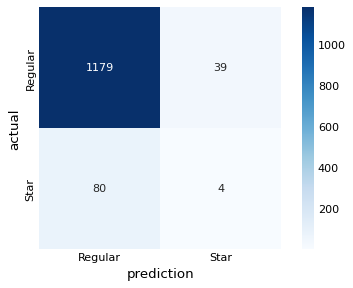

In [61]:
make_confusion_matrix(knn)

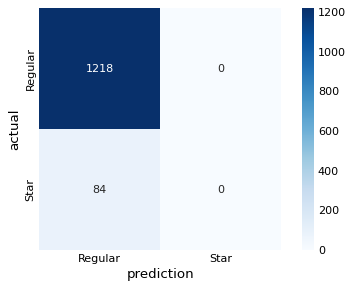

In [62]:
make_confusion_matrix(lm)

### Precision & Recall

In [63]:
# using the default threshold of 0.5, which is what vanilla predict does
y_predict = lm.predict(X_te)
print("Default threshold:")
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(y_test, y_predict), 
                                                     recall_score(y_test, y_predict)))

Default threshold:
Precision: 0.0000,   Recall: 0.0000


/Users/amirreza/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [64]:
# using the new threshold of 0.06
y_predict = (lm.predict_proba(X_te)[:,1] > 0.06)
print("Threshold of 0.06:")
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(y_test, y_predict), 
                                                     recall_score(y_test, y_predict)))

Threshold of 0.06:
Precision: 0.1279,   Recall: 0.6667


In [65]:
# using the new threshold of 0.75
y_predict = (lm.predict_proba(X_te)[:,1] > 0.975)
print("Threshold of 0.75:")
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(y_test, y_predict), 
                                                     recall_score(y_test, y_predict)))

Threshold of 0.75:
Precision: 0.0000,   Recall: 0.0000


/Users/amirreza/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [66]:
# using the new threshold of 0.18
y_predict = (lm.predict_proba(X_te)[:,1] > 0.18)
print("Threshold of 0.18:")
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(y_test, y_predict), 
                                                     recall_score(y_test, y_predict)))

Threshold of 0.18:
Precision: 0.1910,   Recall: 0.2024


In [67]:
# using the new threshold of 0.02
y_predict = (lm.predict_proba(X_te)[:,1] > 0.00)
print("Threshold of 0.02:")
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(y_test, y_predict), 
                                                     recall_score(y_test, y_predict)))

Threshold of 0.02:
Precision: 0.0645,   Recall: 1.0000


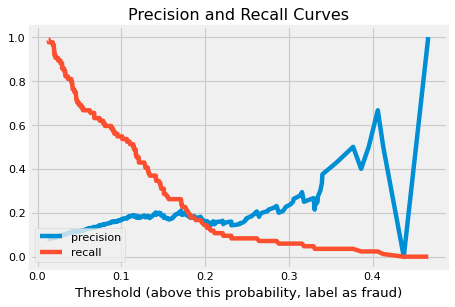

In [68]:
# We can also use the probabilities to make a curve showing us how recall 
# and thresholds trade off 
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score
precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_test, lm.predict_proba(X_te)[:,1] )

plt.figure(dpi=80)
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as fraud)');
plt.title('Precision and Recall Curves');

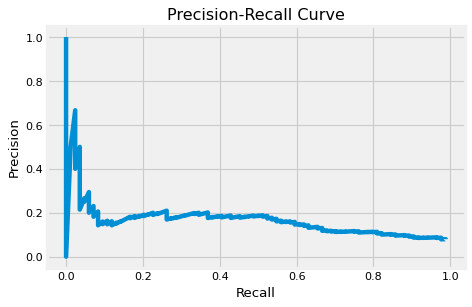

In [69]:
plt.figure(dpi=80)
plt.plot(recall_curve[1:], precision_curve[1:],label='precision')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve");

### ROC Curve

In [70]:
# Precision = TP / (TP + FP)
# Recall = TP/P = True positive rate
# false positive rate = FP / true negatives = FP / (FP + TN) 
from sklearn.metrics import roc_auc_score, roc_curve

fpr, tpr, thresholds = roc_curve(y_test, lm.predict_proba(X_te)[:,1])

ROC AUC score =  0.7491692079130502


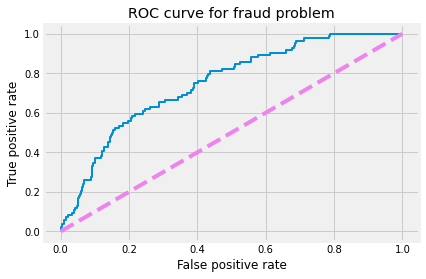

In [71]:
plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for fraud problem');
print("ROC AUC score = ", roc_auc_score(y_test, lm.predict_proba(X_te)[:,1]))

### Log Loss Cross-Entropy

In [72]:
from sklearn.metrics import log_loss

print("Log-loss on logit: {:6.4f}".format(log_loss(y_test, lm.predict_proba(X_te))))

Log-loss on logit: 0.2158


In [73]:
from sklearn.dummy import DummyClassifier

dc = DummyClassifier()
dc.fit(X_tr, y_train)
print("Log-loss on dummy classifier: {:6.4f}".format(log_loss(y_test, dc.predict_proba(X_te))))

Log-loss on dummy classifier: 0.2393


In [74]:
print("Logistic accuracy: {:6.4f}".format(lm.score(X_te, y_test)))
print("Dummy accuracy: {:6.4f}".format(dc.score(X_te, y_test)))

Logistic accuracy: 0.9355
Dummy accuracy: 0.9355


In [75]:
'''# Print confusion matrix for kNN
knn_confusion = confusion_matrix(y_test, knn.predict(X_te))
plt.figure(dpi=150)
sns.heatmap(knn_confusion, cmap=plt.cm.Blues, annot=True, square=True,
           xticklabels=df_normalized['Star Client'],
           yticklabels=df_normalized['Star Client'])

plt.xlabel('Predicted Star Lead')
plt.ylabel('Actual Star Lead')
plt.title('kNN confusion matrix');'''

"# Print confusion matrix for kNN\nknn_confusion = confusion_matrix(y_test, knn.predict(X_te))\nplt.figure(dpi=150)\nsns.heatmap(knn_confusion, cmap=plt.cm.Blues, annot=True, square=True,\n           xticklabels=df_normalized['Star Client'],\n           yticklabels=df_normalized['Star Client'])\n\nplt.xlabel('Predicted Star Lead')\nplt.ylabel('Actual Star Lead')\nplt.title('kNN confusion matrix');"

In [76]:
#df['Client'] = df['Star Client'].apply(lambda x: 'Star' if x == 1 else 'Regular')

### Cross Validation

In [77]:
from sklearn.model_selection import cross_val_score

In [78]:
# 10-fold cross-validation with K=5 for KNN (the n_neighbors parameter)
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')

print(scores)

[0.93394777 0.93701997 0.93548387 0.93394777 0.93855607 0.93855607
 0.93548387 0.93548387 0.93087558 0.93394777]


In [79]:
# use average accuracy as an estimate of out-of-sample accuracy
print(scores.mean())

0.9353302611367129


In [80]:
# search for an optimal value of K for KNN
k_range = list(range(1, 31))
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())

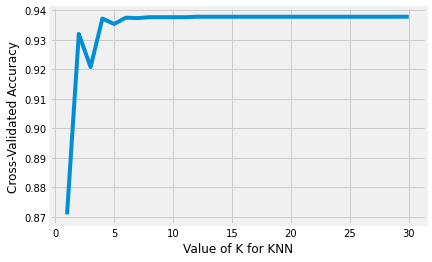

In [81]:
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy');

### GridSearchCV

In [82]:
from sklearn.model_selection import GridSearchCV

In [83]:
# define the parameter values that should be searched
k_range = list(range(1, 100))

In [84]:
# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_neighbors=k_range)

In [85]:
# instantiate the grid
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

In [86]:
# fit the grid with data
grid.fit(X, y);

In [87]:
# view the complete results
df_cv = pd.DataFrame(grid.cv_results_)
df_cv.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003767,0.001689,0.056167,0.009387,1,{'n_neighbors': 1},0.857143,0.864823,0.872504,0.858679,0.883257,0.855607,0.866359,0.877112,0.883257,0.889401,0.870814,0.011484,99
1,0.003988,0.001240,0.073947,0.017712,2,{'n_neighbors': 2},0.926267,0.933948,0.937020,0.933948,0.930876,0.921659,0.932412,0.933948,0.937020,0.932412,0.931951,0.004507,97
2,0.003511,0.000644,0.073815,0.013477,3,{'n_neighbors': 3},0.920123,0.927803,0.927803,0.923195,0.924731,0.915515,0.920123,0.921659,0.909370,0.917051,0.920737,0.005418,98
3,0.003501,0.000736,0.093415,0.019009,4,{'n_neighbors': 4},0.935484,0.935484,0.937020,0.938556,0.938556,0.937020,0.937020,0.937020,0.938556,0.937020,0.937174,0.001075,95
4,0.004365,0.001243,0.103671,0.019702,5,{'n_neighbors': 5},0.933948,0.937020,0.935484,0.933948,0.938556,0.938556,0.935484,0.935484,0.930876,0.933948,0.935330,0.002221,96


In [88]:
# examine the best model
print("Best params: ", grid.best_params_)
print("Best estimator: ", grid.best_estimator_)
print("Best score: ", grid.best_score_)

Best params:  {'n_neighbors': 12}
Best estimator:  KNeighborsClassifier(n_neighbors=12)
Best score:  0.9377880184331795


## Class Imbalance 

### Oversampling

In [89]:
#Split the data 60 - 20 - 20 train/val/test

#X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
#X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=.25, random_state=43)

In [90]:
import imblearn.over_sampling

# setup for the ratio argument of RandomOverSampler initialization
n_pos = np.sum(y_train == 1)
n_neg = np.sum(y_train == 0)
ratio = {1 : n_pos * 4, 0 : n_neg} 

# randomly oversample positive samples: create 4x as many 
ROS = imblearn.over_sampling.RandomOverSampler(sampling_strategy = ratio, random_state=42) 
    
X_tr_rs, y_tr_rs = ROS.fit_resample(X_train, y_train)

lr = LogisticRegression(solver='liblinear') 
lr.fit(X_train, y_train)

print('Simple Logistic Regression; Test F1: %.3f, Test AUC: %.3f' % \
      (f1_score(y_val, lr.predict(X_val)), roc_auc_score(y_val, lr.predict_proba(X_val)[:,1]))) 

lr_os = LogisticRegression(solver='liblinear') 
lr_os.fit(X_tr_rs, y_tr_rs)

print('Logistic Regression on Oversampled Train Data; Test F1: %.3f, Test AUC: %.3f' % \
      (f1_score(y_val, lr_os.predict(X_val)), roc_auc_score(y_val, lr_os.predict_proba(X_val)[:,1])))

Simple Logistic Regression; Test F1: 0.000, Test AUC: 0.793
Logistic Regression on Oversampled Train Data; Test F1: 0.162, Test AUC: 0.798


### SMOTE

In [91]:
smote = imblearn.over_sampling.SMOTE(sampling_strategy=ratio, random_state = 42)
    
X_tr_smote, y_tr_smote = smote.fit_resample(X_train, y_train)

lr_smote = LogisticRegression(solver='liblinear') 
lr_smote.fit(X_tr_smote, y_tr_smote)

print('Logistic Regression on SMOTE Train Data; Test F1: %.3f, Test AUC: %.3f' % \
      (f1_score(y_val, lr_smote.predict(X_val)), roc_auc_score(y_val, lr_smote.predict_proba(X_val)[:,1])))

Logistic Regression on SMOTE Train Data; Test F1: 0.000, Test AUC: 0.810
